# Linkage Clustering


- **Author : Mustafa Sadeghi**
- **E-mail : mustafasadeghi@mail.um.ac.ir**

## Introduction

Welcome to this detailed lecture on **Linkage Clustering**, a fundamental technique in hierarchical clustering within unsupervised machine learning. Clustering aims to group data points such that those within the same cluster are more similar to each other than to those in other clusters.

This lecture will cover:

- Fundamental concepts and definitions in clustering.
- Detailed explanations of hierarchical clustering methods.
- Comprehensive coverage of distance measures.
- In-depth discussion of linkage criteria with mathematical derivations.
- Step-by-step algorithmic procedures.
- Numerical exercises with solutions.
- Practical implementation using Python code.

## 1. Basics of Clustering

### Definition of Clustering

**Clustering** is the task of partitioning a set of data points into groups (clusters) such that:

- **Intra-cluster similarity** is high: Data points within the same cluster are similar.
- **Inter-cluster similarity** is low: Data points from different clusters are dissimilar.

**Mathematically**, given a dataset $ X = \{x_1, x_2, \dots, x_n\} $, the goal is to partition $ X $ into $ k $ clusters $ C = \{C_1, C_2, \dots, C_k\} $ such that:

- **Completeness**: $ \bigcup_{i=1}^k C_i = X $
- **Exclusive Membership**: $ C_i \cap C_j = \emptyset $ for all $ i \neq j $

### Types of Clustering

There are many categories and types of clustering, as well as clustering algorithms. I have prepared a table for you to provide an overview, and I will explain some of them. If you are interested in more information, you can visit the following links :
 - [Clustering algorithms by Google developers](https://developers.google.com/machine-learning/clustering/clustering-algorithms)
 - [A Comprehensive Survey of Clustering Algorithms by SPRINGER](https://link.springer.com/article/10.1007/s40745-015-0040-1)






| Clustering Type                 | Algorithms                                                                                                                                           |
|---------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Partitioning Methods**        | K-means, K-medoids, PAM (Partitioning Around Medoids), CLARA (Clustering Large Applications)                                                         |
| **Hierarchical Methods**        | Agglomerative clustering, Divisive clustering, BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies), CURE (Clustering Using Representatives) |
| **Density-based Methods**       | DBSCAN (Density-Based Spatial Clustering of Applications with Noise), OPTICS (Ordering Points To Identify the Clustering Structure), MeanShift       |
| **Grid-based Methods**          | STING (Statistical Information Grid), CLIQUE (Clustering In QUEst), WaveCluster                                                                       |
| **Model-based Methods**         | EM (Expectation-Maximization), Gaussian Mixture Models, COBWEB, SOM (Self-Organizing Map)                                                             |
| **Fuzzy Clustering**            | Fuzzy C-means, Gustafson–Kessel (GK) algorithm                                                                                                        |
| **Spectral Clustering**         | Normalized cuts, Ratio cuts, Multilevel graph partitioning methods                                                                                    |
| **Subspace Clustering**         | PROCLUS (Projected Clustering), CLIQUE, SUBCLU                                                                                                        |
| **Constraint-based Clustering** | COP-KMeans (Constrained K-Means), Seeded K-Means                                                                                                      |
| **Neural Network-based Clustering** | Self-Organizing Maps (SOM), Neural Gas Algorithm, Autoencoder-based Clustering                                                                  |
| **Deep Clustering**             | Deep Embedding Clustering (DEC), Variational Deep Embedding (VaDE)                                                                                    |






1. **Partitioning Methods**:
   - **Definition**: Techniques that divide data into non-overlapping subsets (clusters) such that each data point belongs to exactly one cluster.
   - **Examples**: K-means clustering, K-medoids.

2. **Hierarchical Methods**:
   - **Definition**: Techniques that create a hierarchy of clusters, represented as a tree (dendrogram).
   - **Subtypes**:
     - **Agglomerative Clustering (Bottom-Up)**: Builds the hierarchy by successively merging smaller clusters.
     - **Divisive Clustering (Top-Down)**: Builds the hierarchy by successively splitting larger clusters.

3. **Density-Based Methods**:
   - **Definition**: Techniques that identify clusters as dense regions in the data space, separated by regions of lower density.
   - **Examples**: DBSCAN, OPTICS.

4. **Model-Based Methods**:
   - **Definition**: Techniques that assume the data is generated by a mixture of underlying probability distributions (models).
   - **Examples**: Gaussian Mixture Models (GMM).


Clustering helps in understanding the natural grouping within data without prior knowledge of class labels. It is widely used in exploratory data analysis, pattern recognition, image processing, and bioinformatics.

**Key Considerations**:

- **Similarity Measures**: Essential for determining how data points are grouped.
- **Number of Clusters**: Determining the optimal number of clusters is often challenging and may require domain knowledge or methods like the elbow method or silhouette analysis.
- **Scalability**: Clustering algorithms should handle large datasets efficiently.

### **Difference between Clutering and Regression and Classification**

In classification and regression models, we are given a data set(D) which contains data points(Xi) and class labels(Yi). Where, Yi’s belong to {0,1} or {0,1,2,…,n) for Classification models and Yi’s belong to real values for regression models.
When it comes to clustering, we’re provided with a data set that contains only data points(Xi). Here we’re not provided with the class labels(Yi).






### Exercise  :

**Dataset**:

Consider the following data points in 2D space:

$$
\begin{align*}
x_1 &= (1, 2) \\
x_2 &= (2, 1) \\
x_3 &= (4, 5) \\
x_4 &= (5, 4) \\
\end{align*}
$$

**Exercise**:

- **Question**: Visually inspect and suggest how to cluster these points into two clusters. Provide a brief explanation.

**Solution**:

- **Visualization**:
  - Plotting the points, we observe that $ x_1 $ and $ x_2 $ are close to each other in the lower-left region.
  - $ x_3 $ and $ x_4 $ are close to each other in the upper-right region.

- **Clustering**:
  - **Cluster 1**: $ x_1 $ and $ x_2 $
  - **Cluster 2**: $ x_3 $ and $ x_4 $

- **Explanation**:
  - The spatial proximity suggests two natural groupings based on the positions of the data points.

**Answer**:

- **Cluster 1**: $ x_1 = (1, 2) $, $ x_2 = (2, 1) $
- **Cluster 2**: $ x_3 = (4, 5) $, $ x_4 = (5, 4) $


## 2. Hierarchical Clustering

### Definition of Hierarchical Clustering

**Hierarchical Clustering** is a method of cluster analysis which seeks to build a hierarchy of clusters. It results in a tree-like structure called a dendrogram, which represents the nested grouping of patterns and the levels at which groupings change.

### Agglomerative Clustering (Bottom-Up)

**Definition**:

Agglomerative clustering is a type of hierarchical clustering that builds the dendrogram from the bottom up.

- **Process**:
  1. **Initialization**: Start with \( n \) singleton clusters (each data point is its own cluster).
  2. **Iteration**:
     - **Compute Proximities**: Calculate the distance between all pairs of clusters using a chosen linkage criterion.
     - **Merge Clusters**: Identify and merge the two closest clusters.
     - **Update Proximities**: Recalculate distances between the new cluster and all other clusters.
  3. **Termination**: Continue until all data points are merged into a single cluster.

### Divisive Clustering (Top-Down)

**Definition**:

Divisive clustering is a hierarchical clustering method that builds the dendrogram from the top down.

- **Process**:
  1. **Initialization**: Start with all data points in a single cluster.
  2. **Iteration**:
     - **Split Clusters**: At each step, the algorithm splits clusters based on a criterion (e.g., maximizing between-cluster dissimilarity).
     - **Update Clusters**: Recalculate the clustering structure after each split.
  3. **Termination**: Continue until each data point is in its own singleton cluster or until a stopping criterion is met.

![img](img1.jpg)

### Dendrograms

**Definition**:

A **dendrogram** is a tree diagram used to illustrate the arrangement of clusters produced by hierarchical clustering.

- **Components**:
  - **Leaves**: Represent individual data points.
  - **Branches**: Represent clusters formed by merging data points or clusters.
  - **Height**: Represents the distance or dissimilarity at which clusters are merged or split.

**Interpretation**:

- By cutting the dendrogram at a particular height, we can obtain a specific number of clusters.
- The height of the merge (vertical axis) corresponds to the distance between the clusters being merged.

![img2](img2.gif)


**Agglomerative vs. Divisive Clustering**:

- **Agglomerative Clustering**:
  - Starts with individual data points and merges them to form clusters.
  - Commonly used due to its simplicity and ease of implementation.
  - More computationally efficient for smaller datasets.

- **Divisive Clustering**:
  - Starts with the entire dataset and recursively splits it into smaller clusters.
  - Less commonly used due to higher computational complexity.
  - Can be more effective in certain situations where the global structure is more evident.

**Advantages of Hierarchical Clustering**:

- Does not require specifying the number of clusters in advance.
- Can capture complex relationships between data points.
- The dendrogram provides a visual representation of data similarity.

**Disadvantages**:

- Computationally intensive, especially for large datasets.
- Once a merge or split is done, it cannot be undone (greedy approach).
- Sensitive to noise and outliers.



## 3. Distance Measures

### Euclidean Distance

**Definition**:

The **Euclidean distance** between two points $ x = (x_1, x_2, \dots, x_n) $ and $ y = (y_1, y_2, \dots, y_n) $ is:

$$
d_{\text{Euclidean}}(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

**Properties**:

- **Symmetry**: $ d(x, y) = d(y, x) $
- **Non-negativity**: $ d(x, y) \geq 0 $
- **Identity**: $ d(x, y) = 0 $ if and only if $ x = y $
- **Triangle Inequality**: $ d(x, z) \leq d(x, y) + d(y, z) $

### Manhattan Distance

**Definition**:

The **Manhattan distance** (also known as Taxicab distance) between two points is:

$$
d_{\text{Manhattan}}(x, y) = \sum_{i=1}^n |x_i - y_i|
$$

**Properties**:

- Measures the distance between two points along axes at right angles.
- Useful in grid-based layouts.

### Other Distance Metrics

#### Minkowski Distance

**Definition**:

A generalization of both Euclidean and Manhattan distances:

$$
d_{\text{Minkowski}}(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{1/p}
$$

- **Special Cases**:
  - $ p = 1 $: Manhattan distance.
  - $ p = 2 $: Euclidean distance.

#### Cosine Similarity

**Definition**:

Measures the cosine of the angle between two non-zero vectors:

$$
\text{Cosine Similarity}(x, y) = \frac{x \cdot y}{||x|| \, ||y||}
$$

- **Cosine Distance**: $ d_{\text{Cosine}}(x, y) = 1 - \text{Cosine Similarity}(x, y) $

#### Hamming Distance

**Definition**:

- Counts the number of positions at which the corresponding elements are different.
- Applicable to strings or vectors of equal length.


**Importance of Distance Measures**:

- The choice of distance measure can significantly impact the clustering results.
- Different distance measures capture different notions of similarity.

**Scaling and Normalization**:

- **Issue**: Features with larger scales can dominate the distance calculations.
- **Solution**: Normalize or standardize the data.

  - **Min-Max Scaling**:

    $$
    x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
    $$

  - **Standardization (Z-score Normalization)**:

    $$
    x_{\text{standardized}} = \frac{x - \mu}{\sigma}
    $$

###  Exercise 


- **Question**: Calculate the Euclidean and Manhattan distances between $ x = (3, 4) $ and $ y = (7, 1) $.

**Solution**:

**Euclidean Distance**:

$$
\begin{align*}
d_{\text{Euclidean}}(x, y) &= \sqrt{(3 - 7)^2 + (4 - 1)^2} \\
&= \sqrt{(-4)^2 + (3)^2} \\
&= \sqrt{16 + 9} \\
&= \sqrt{25} \\
&= 5 \\
\end{align*}
$$

**Manhattan Distance**:

$$
\begin{align*}
d_{\text{Manhattan}}(x, y) &= |3 - 7| + |4 - 1| \\
&= 4 + 3 \\
&= 7 \\
\end{align*}
$$

**Answer**:

- **Euclidean Distance**: 5
- **Manhattan Distance**: 7


Euclidean Distance: 5.00
Manhattan Distance: 7.00
Minkowski Distance (p=3): 4.50
Cosine Distance: 0.29
Hamming Distance: 1


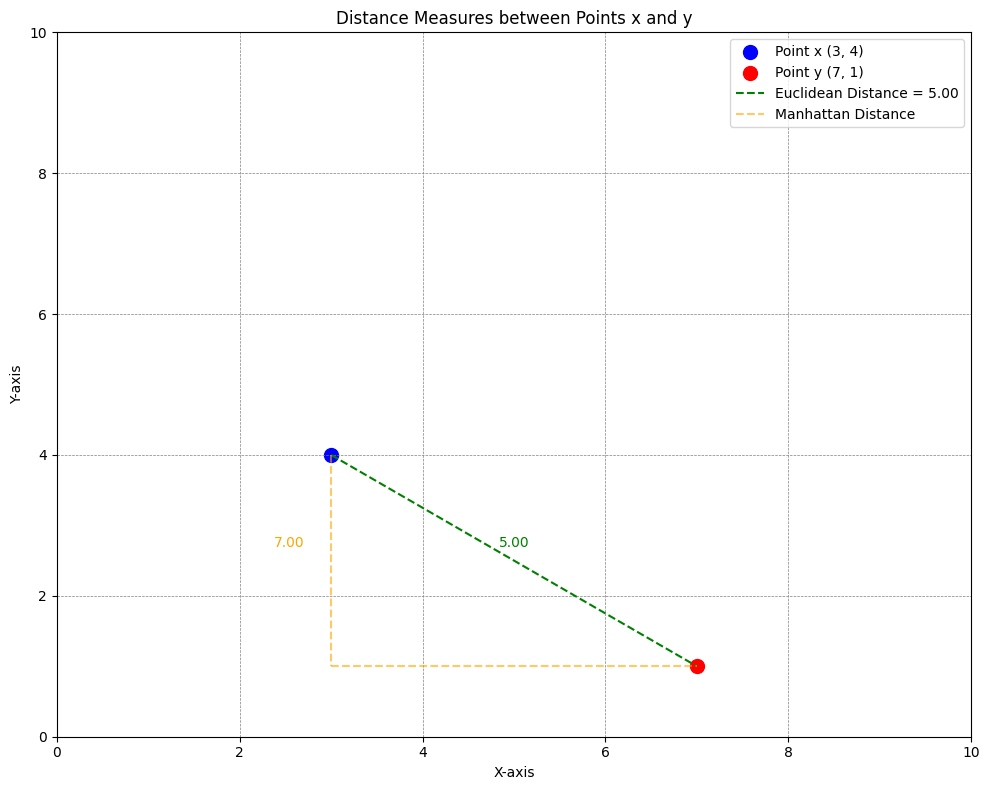

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the points
x = np.array([3, 4])
y = np.array([7, 1])

# Calculate Euclidean Distance
euclidean_distance = np.linalg.norm(x - y)
print(f'Euclidean Distance: {euclidean_distance:.2f}')

# Calculate Manhattan Distance
manhattan_distance = np.sum(np.abs(x - y))
print(f'Manhattan Distance: {manhattan_distance:.2f}')

# Calculate Minkowski Distance (p=3 as an example)
p = 3
minkowski_distance = np.power(np.sum(np.abs(x - y) ** p), 1/p)
print(f'Minkowski Distance (p={p}): {minkowski_distance:.2f}')

# Calculate Cosine Similarity and Distance
cosine_similarity = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
cosine_distance = 1 - cosine_similarity
print(f'Cosine Distance: {cosine_distance:.2f}')

# Calculate Hamming Distance
binary_x = (x >= 5).astype(int)
binary_y = (y >= 5).astype(int)
hamming_distance = np.sum(binary_x != binary_y)
print(f'Hamming Distance: {hamming_distance}')

# Plotting the points
plt.figure(figsize=(10, 8))
plt.scatter(*x, color='blue', label='Point x (3, 4)', s=100)
plt.scatter(*y, color='red', label='Point y (7, 1)', s=100)

# Plotting the Euclidean distance as a line
plt.plot([x[0], y[0]], [x[1], y[1]], color='green', linestyle='--', label=f'Euclidean Distance = {euclidean_distance:.2f}')

# Plotting the Manhattan distance (horizontal and vertical lines)
plt.plot([x[0], x[0]], [x[1], y[1]], color='orange', linestyle='--', label='Manhattan Distance', alpha=0.6)
plt.plot([x[0], y[0]], [y[1], y[1]], color='orange', linestyle='--', alpha=0.6)

# Annotations for distances
plt.annotate(f'{euclidean_distance:.2f}', ((x[0] + y[0]) / 2, (x[1] + y[1]) / 2), textcoords="offset points", xytext=(0,10), ha='center', color='green')
plt.annotate(f'{manhattan_distance:.2f}', (x[0], (x[1] + y[1]) / 2), textcoords="offset points", xytext=(-30,10), ha='center', color='orange')

# Set limits and labels
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Distance Measures between Points x and y')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## 4. Linkage Criteria

Linkage criteria determine how distances between clusters are computed based on the distances between data points.

### Single Linkage

**Definition**:

The distance between two clusters $A$ and $B$ is the minimum distance between any pair of points $a \in A$ and $b \in B$:

$$
D_{\text{single}}(A, B) = \min_{a \in A, b \in B} d(a, b)
$$

**Characteristics**:

- Can handle non-elliptical shapes.
- May result in a "chaining" effect, forming long, elongated clusters.

### Complete Linkage

**Definition**:

The distance between two clusters $A$ and $B$ is the maximum distance between any pair of points $a \in A$ and $b \in B$:

$$
D_{\text{complete}}(A, B) = \max_{a \in A, b \in B} d(a, b)
$$

**Characteristics**:

- Tends to produce compact clusters of approximately equal diameters.
- More robust to outliers compared to single linkage.

### Average Linkage

**Definition**:

The distance between two clusters $A$ and $B$ is the average of all pairwise distances between points in $A$ and $B$:

$$
D_{\text{average}}(A, B) = \frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a, b)
$$

**Characteristics**:

- Provides a compromise between single and complete linkage.
- Considers all pairwise distances, offering a balanced approach.

### Ward's Method

**Definition**:

Ward's method minimizes the total within-cluster variance. At each step, the pair of clusters that leads to the minimum increase in total within-cluster variance after merging is chosen.

**Formula**:

$$
\Delta(A, B) = \frac{|A||B|}{|A| + |B|} || \bar{a} - \bar{b} ||^2
$$

- $|A|, |B|$: Number of data points in clusters $A$ and $B$.
- $\bar{a}, \bar{b}$: Centroids of clusters $A$ and $B$.
- $|| \bar{a} - \bar{b} ||^2$: Squared Euclidean distance between centroids.

### Derivation of Ward's Method

**Objective**:

Minimize the total within-cluster sum of squares (WCSS) after each merge.

**Steps**:

1. **Compute Centroids**:

   $$
   \bar{a} = \frac{1}{|A|} \sum_{x \in A} x, \quad \bar{b} = \frac{1}{|B|} \sum_{x \in B} x
   $$

2. **Calculate WCSS Before Merging**:

   $$
   \text{WCSS}_{\text{before}} = \sum_{x \in A} || x - \bar{a} ||^2 + \sum_{x \in B} || x - \bar{b} ||^2
   $$

3. **Compute New Centroid After Merging**:

   $$
   \bar{c} = \frac{|A| \bar{a} + |B| \bar{b}}{|A| + |B|}
   $$

4. **Calculate WCSS After Merging**:

   $$
   \text{WCSS}_{\text{after}} = \sum_{x \in A \cup B} || x - \bar{c} ||^2
   $$

5. **Compute Increase in WCSS**:

   $$
   \Delta(A, B) = \text{WCSS}_{\text{after}} - \text{WCSS}_{\text{before}}
   $$

6. **Derive the Formula**:

   - Through algebraic manipulation, arrive at:

     $$
     \Delta(A, B) = \frac{|A||B|}{|A| + |B|} || \bar{a} - \bar{b} ||^2
     $$


**Comparison of Linkage Criteria**:

- **Single Linkage**:
  - Pros: Captures clusters with complex shapes.
  - Cons: Sensitive to noise and outliers; may create elongated clusters.

- **Complete Linkage**:
  - Pros: Tends to find compact clusters.
  - Cons: Can break large clusters due to outliers.

- **Average Linkage**:
  - Pros: Balances the effects of single and complete linkage.
  - Cons: Computationally more intensive due to averaging over all pairs.

- **Ward's Method**:
  - Pros: Minimizes variance within clusters; often produces clusters of similar size.
  - Cons: Assumes spherical clusters; sensitive to outliers.

**Choosing a Linkage Criterion**:

- Depends on the dataset and the specific requirements of the analysis.
- Experimentation may be necessary to determine the most appropriate method.

###  Exercise 

**Dataset**:

Clusters:

- **Cluster $A$**:
  - $x_1 = (1, 2)$
  - $x_2 = (2, 2)$
- **Cluster $B$**:
  - $x_3 = (5, 6)$
  - $x_4 = (6, 5)$



Compute the distance between clusters $A$ and $B$ using:

1. Single Linkage
2. Complete Linkage
3. Average Linkage
4. Ward's Method

**Solution**:

**Step 1: Compute Pairwise Distances**

$$
\begin{align*}
d_{13} &= \sqrt{(1 - 5)^2 + (2 - 6)^2} = \sqrt{16 + 16} = \sqrt{32} \approx 5.6569 \\
d_{14} &= \sqrt{(1 - 6)^2 + (2 - 5)^2} = \sqrt{25 + 9} = \sqrt{34} \approx 5.8300 \\
d_{23} &= \sqrt{(2 - 5)^2 + (2 - 6)^2} = \sqrt{9 + 16} = \sqrt{25} = 5.0000 \\
d_{24} &= \sqrt{(2 - 6)^2 + (2 - 5)^2} = \sqrt{16 + 9} = \sqrt{25} = 5.0000 \\
\end{align*}
$$

**1. Single Linkage**

$$
D_{\text{single}}(A, B) = \min\{ d_{13}, d_{14}, d_{23}, d_{24} \} = \min\{ 5.6569, 5.8300, 5.0000, 5.0000 \} = 5.0000
$$

**2. Complete Linkage**

$$
D_{\text{complete}}(A, B) = \max\{ d_{13}, d_{14}, d_{23}, d_{24} \} = \max\{ 5.6569, 5.8300, 5.0000, 5.0000 \} = 5.8300
$$

**3. Average Linkage**

$$
\begin{align*}
D_{\text{average}}(A, B) &= \frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a, b) \\
&= \frac{1}{4} (d_{13} + d_{14} + d_{23} + d_{24}) \\
&= \frac{1}{4} (5.6569 + 5.8300 + 5.0000 + 5.0000) \\
&= \frac{1}{4} (21.4869) \\
&\approx 5.3717 \\
\end{align*}
$$

**4. Ward's Method**

**Compute Centroids**:

$$
\begin{align*}
\bar{a} &= \frac{(1, 2) + (2, 2)}{2} = \left( \frac{3}{2}, 2 \right) \\
\bar{b} &= \frac{(5, 6) + (6, 5)}{2} = \left( \frac{11}{2}, \frac{11}{2} \right) = (5.5, 5.5) \\
\end{align*}
$$

**Compute Squared Distance Between Centroids**:

$$
|| \bar{a} - \bar{b} ||^2 = (1.5 - 5.5)^2 + (2 - 5.5)^2 = (-4)^2 + (-3.5)^2 = 16 + 12.25 = 28.25
$$

**Apply Ward's Formula**:

$$
\Delta(A, B) = \frac{|A||B|}{|A| + |B|} || \bar{a} - \bar{b} ||^2 = \frac{2 \cdot 2}{4} \cdot 28.25 = 1 \cdot 28.25 = 28.25
$$

Compute Ward's Distance:

$$ 
D_{\text{Ward}}(A, B) = \sqrt{\Delta(A, B)} = \sqrt{28.25} \approx 5.3151
$$
### Conclusion

The choice of linkage criterion significantly affects clustering results. The various methods suit different datasets and analysis goals.


## Implementation of different Linkage criterias in Python

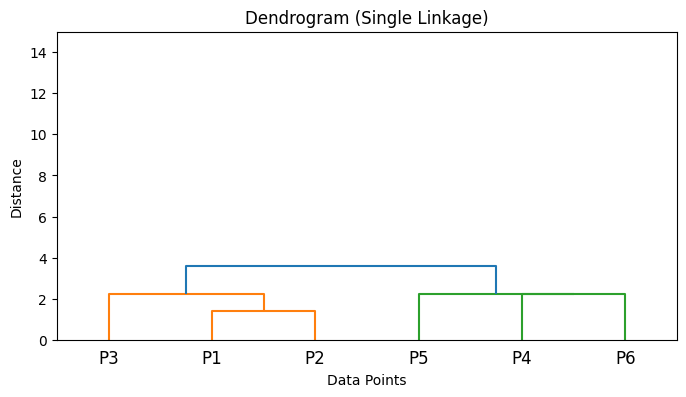

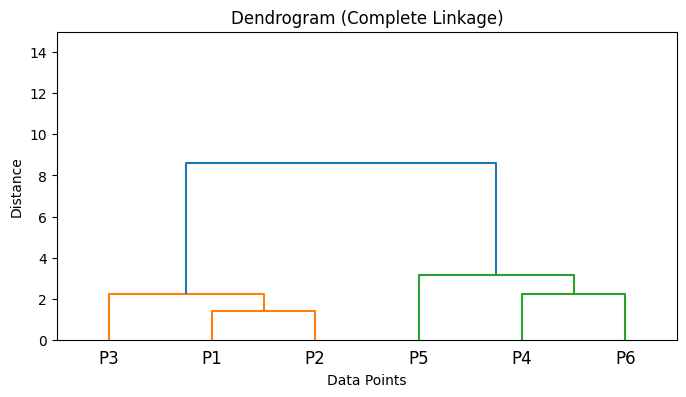

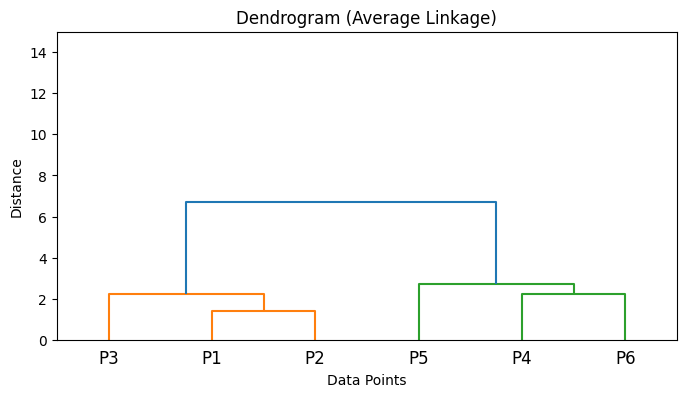

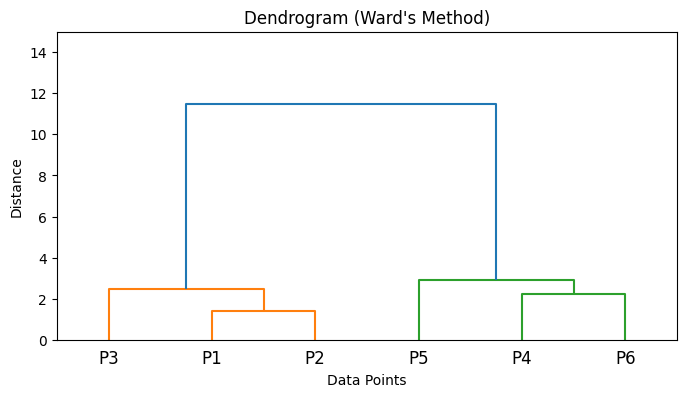

In [15]:
from scipy.cluster.hierarchy import linkage
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Sample data points
X = np.array([
    [1, 2],  # Point 1
    [2, 1],  # Point 2
    [3, 3],  # Point 3
    [6, 5],  # Point 4
    [7, 8],  # Point 5
    [8, 6],  # Point 6
])

# Compute linkage matrices for different linkage methods
Z_single = linkage(X, method='single')
Z_complete = linkage(X, method='complete')
Z_average = linkage(X, method='average')
Z_ward = linkage(X, method='ward')

# List of linkage matrices and their labels
linkage_matrices = [
    ('Single Linkage', Z_single),
    ('Complete Linkage', Z_complete),
    ('Average Linkage', Z_average),
    ('Ward\'s Method', Z_ward),
]

# Plot dendrograms
for title, Z in linkage_matrices:
    plt.figure(figsize=(8, 4))
    dendrogram(Z, labels=[f'P{i+1}' for i in range(len(X))])
    plt.title(f'Dendrogram ({title})')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.ylim(0, 15)  # Set y-axis limit to be between 0 and 15
    plt.show()


## 5. Algorithm Steps

### Step-by-Step Procedure

**Agglomerative Hierarchical Clustering Algorithm:**

1. **Compute the Initial Distance Matrix:**

   - For all pairs of data points $ x_i $ and $ x_j $ in the dataset $ X = \{ x_1, x_2, \dots, x_n \} $, compute the distance $ d(x_i, x_j) $ using a chosen distance metric (e.g., Euclidean distance).
   - This results in an $ n \times n $ symmetric distance matrix $ D $.

2. **Initialize Clusters:**

   - Start with $ n $ singleton clusters, each containing one data point:
     $$
     C_1 = \{ x_1 \}, \quad C_2 = \{ x_2 \}, \dots, \quad C_n = \{ x_n \}
     $$

3. **Repeat Until Only One Cluster Remains:**

   a. **Find the Closest Pair of Clusters:**

      - Identify the pair of clusters $ (C_p, C_q) $ with the smallest distance $ D(C_p, C_q) $ based on the chosen linkage criterion (e.g., single linkage, complete linkage).

   b. **Merge the Closest Clusters:**

      - Merge clusters $ C_p $ and $ C_q $ to form a new cluster $ C_{pq} = C_p \cup C_q $.

   c. **Update the Distance Matrix:**

      - Remove the rows and columns corresponding to $ C_p $ and $ C_q $ from the distance matrix.
      - Compute distances between the new cluster $ C_{pq} $ and all other existing clusters using the linkage criterion.
      - Add a new row and column for $ C_{pq} $ in the distance matrix with the updated distances.

4. **Construct the Dendrogram:**

   - Record each merge operation and the distance at which clusters are merged.
   - Use this information to build the dendrogram, illustrating the hierarchical relationships.


**Why Updating the Distance Matrix is Necessary:**

- When clusters are merged, the distances between the new cluster and the remaining clusters need to be recalculated based on the linkage criterion.
- This ensures that the algorithm accurately reflects the current state of the clustering process.

**Linkage Criteria Impact on Distance Updates:**

- **Single Linkage:**

  - Distance between the new cluster $ C_{pq} $ and another cluster $ C_k $ is:
    $$
    D_{\text{single}}(C_{pq}, C_k) = \min \left( D(C_p, C_k), \, D(C_q, C_k) \right)
    $$

- **Complete Linkage:**

  - Distance between the new cluster $ C_{pq} $ and another cluster $ C_k $ is:
    $$
    D_{\text{complete}}(C_{pq}, C_k) = \max \left( D(C_p, C_k), \, D(C_q, C_k) \right)
    $$

- **Average Linkage:**

  - Distance between the new cluster $ C_{pq} $ and another cluster $ C_k $ is:
    $$
    D_{\text{average}}(C_{pq}, C_k) = \frac{|C_p| \cdot D(C_p, C_k) + |C_q| \cdot D(C_q, C_k)}{|C_p| + |C_q|}
    $$

- **Ward's Method:**

  - Update using:
    $$
    \Delta(C_{pq}, C_k) = \frac{(|C_p| + |C_k|) \cdot \Delta(C_p, C_k) + (|C_q| + |C_k|) \cdot \Delta(C_q, C_k) - |C_k| \cdot \Delta(C_p, C_q)}{|C_p| + |C_q| + |C_k|}
    $$

**Optimization Strategies:**

- **Nearest Neighbor Chains:**

  - Reduce the search space by maintaining a chain of nearest neighbors.

- **Heap Data Structures:**

  - Use heaps to efficiently find the closest pair of clusters.

###  Exercise 

**Dataset:**

Consider the following data points in a one-dimensional space:

$$
\begin{align*}
x_1 &= 1 \\
x_2 &= 2 \\
x_3 &= 5 \\
x_4 &= 10 \\
\end{align*}
$$



- **Question: Perform agglomerative hierarchical clustering using all kinds of linkage criteria you have learned. At each step, show the distance matrix, the clusters being merged, and the updated distance matrix.**


### **1. Complete Linkage Method**

In Complete Linkage, the distance between two clusters is defined as the **maximum** distance between any pair of points, one from each cluster.

#### **Step-by-Step Solution**

#### **Step 1: Initial Distance Matrix**

$$
\begin{array}{c|cccc}
 & x_1 & x_2 & x_3 & x_4 \\
\hline
x_1 & 0 & 1 & 4 & 9 \\
x_2 & 1 & 0 & 3 & 8 \\
x_3 & 4 & 3 & 0 & 5 \\
x_4 & 9 & 8 & 5 & 0 \\
\end{array}
$$

#### **Step 2: Initialize Clusters**

$$
C_1 = \{ x_1 \}, \quad C_2 = \{ x_2 \}, \quad C_3 = \{ x_3 \}, \quad C_4 = \{ x_4 \}
$$

#### **Step 3: First Merge**

- **Closest Pair:** $C_1$ and $C_2$ with distance $D(C_1, C_2) = 1$.
- **Merge to form:** $C_{12} = \{ x_1, x_2 \}$.

#### **Step 4: Update the Distance Matrix (Complete Linkage)**

For Complete Linkage, the distance between clusters is the **maximum** distance between their elements.

- **Compute Distances:**
  
  - $D(C_{12}, C_3) = \max(D(x_1, x_3), D(x_2, x_3)) = \max(4, 3) = 4$
  
  - $D(C_{12}, C_4) = \max(D(x_1, x_4), D(x_2, x_4)) = \max(9, 8) = 9$

- **Updated Distance Matrix:**

$$
\begin{array}{c|ccc}
 & C_{12} & x_3 & x_4 \\
\hline
C_{12} & 0 & 4 & 9 \\
x_3 & 4 & 0 & 5 \\
x_4 & 9 & 5 & 0 \\
\end{array}
$$

#### **Step 5: Second Merge**

- **Closest Pair:** $C_{12}$ and $x_3$ with distance $D(C_{12}, x_3) = 4$.
- **Merge to form:** $C_{123} = \{ x_1, x_2, x_3 \}$.

#### **Step 6: Update the Distance Matrix (Complete Linkage)**

- **Compute Distance:**
  
  - $D(C_{123}, C_4) = \max(D(x_1, x_4), D(x_2, x_4), D(x_3, x_4)) = \max(9, 8, 5) = 9$

- **Updated Distance Matrix:**

$$
\begin{array}{c|cc}
 & C_{123} & x_4 \\
\hline
C_{123} & 0 & 9 \\
x_4 & 9 & 0 \\
\end{array}
$$

#### **Step 7: Final Merge**

- **Merge:** $C_{123}$ and $x_4$ to form $C_{1234} = \{ x_1, x_2, x_3, x_4 \}$.


### **2. Single Linkage Method**

In Single Linkage, the distance between two clusters is defined as the **minimum** distance between any pair of points, one from each cluster.

#### **Step-by-Step Solution**

#### **Step 1: Compute the Initial Distance Matrix**

Since the data is one-dimensional, we use absolute differences:

$$
D(x_i, x_j) = |x_i - x_j|
$$

$$
\begin{array}{c|cccc}
 & x_1 & x_2 & x_3 & x_4 \\
\hline
x_1 & 0 & 1 & 4 & 9 \\
x_2 & 1 & 0 & 3 & 8 \\
x_3 & 4 & 3 & 0 & 5 \\
x_4 & 9 & 8 & 5 & 0 \\
\end{array}
$$

#### **Step 2: Initialize Clusters**

$$
C_1 = \{ x_1 \}, \quad C_2 = \{ x_2 \}, \quad C_3 = \{ x_3 \}, \quad C_4 = \{ x_4 \}
$$

#### **Step 3: First Merge**

- **Find the Closest Pair:**
  
  - The smallest non-zero distance is $D(x_1, x_2) = 1$.
  
- **Merge:**
  
  - Merge $C_1$ and $C_2$ to form $C_{12} = \{ x_1, x_2 \}$.

#### **Step 4: Update the Distance Matrix (Single Linkage)**

For Single Linkage, the distance between the new cluster $C_{12}$ and another cluster is the **minimum** distance between any member of $C_{12}$ and any member of the other cluster.

- **Compute Distances:**
  
  - $D(C_{12}, C_3) = \min(D(x_1, x_3), D(x_2, x_3)) = \min(4, 3) = 3$
  
  - $D(C_{12}, C_4) = \min(D(x_1, x_4), D(x_2, x_4)) = \min(9, 8) = 8$

- **Updated Distance Matrix:**

$$
\begin{array}{c|ccc}
 & C_{12} & x_3 & x_4 \\
\hline
C_{12} & 0 & 3 & 8 \\
x_3 & 3 & 0 & 5 \\
x_4 & 8 & 5 & 0 \\
\end{array}
$$

#### **Step 5: Second Merge**

- **Find the Closest Pair:**
  
  - The smallest distance is $D(C_{12}, C_3) = 3$.

- **Merge:**
  
  - Merge $C_{12}$ and $C_3$ to form $C_{123} = \{ x_1, x_2, x_3 \}$.

#### **Step 6: Update the Distance Matrix (Single Linkage)**

For Single Linkage, the distance between $C_{123}$ and $x_4$ is the **minimum** distance between any member of $C_{123}$ and $x_4$.

- **Compute Distance:**
  
  - $D(C_{123}, x_4) = \min(D(x_1, x_4), D(x_2, x_4), D(x_3, x_4)) = \min(9, 8, 5) = 5$

- **Updated Distance Matrix:**

$$
\begin{array}{c|cc}
 & C_{123} & x_4 \\
\hline
C_{123} & 0 & 5 \\
x_4 & 5 & 0 \\
\end{array}
$$

#### **Step 7: Final Merge**

- **Merge:** $C_{123}$ and $x_4$ to form $C_{1234} = \{ x_1, x_2, x_3, x_4 \}$.



### **3. Average Linkage Method**

In Average Linkage, the distance between two clusters is defined as the **average** of all pairwise distances between points in the two clusters.

#### **Step-by-Step Solution**

#### **Step 1: Compute the Initial Distance Matrix**

$$
\begin{array}{c|cccc}
 & x_1 & x_2 & x_3 & x_4 \\
\hline
x_1 & 0 & 1 & 4 & 9 \\
x_2 & 1 & 0 & 3 & 8 \\
x_3 & 4 & 3 & 0 & 5 \\
x_4 & 9 & 8 & 5 & 0 \\
\end{array}
$$

#### **Step 2: Initialize Clusters**

$$
C_1 = \{ x_1 \}, \quad C_2 = \{ x_2 \}, \quad C_3 = \{ x_3 \}, \quad C_4 = \{ x_4 \}
$$

#### **Step 3: First Merge**

- **Find the Closest Pair:**
  
  - The smallest non-zero distance is $D(x_1, x_2) = 1$.
  
- **Merge:**
  
  - Merge $C_1$ and $C_2$ to form $C_{12} = \{ x_1, x_2 \}$.

#### **Step 4: Update the Distance Matrix (Average Linkage)**

For Average Linkage, the distance between the new cluster $C_{12}$ and another cluster is the **average** of all pairwise distances between members of $C_{12}$ and the other cluster.

- **Compute Distances:**
  
  - $D(C_{12}, C_3) = \frac{D(x_1, x_3) + D(x_2, x_3)}{2} = \frac{4 + 3}{2} = 3.5$
  
  - $D(C_{12}, C_4) = \frac{D(x_1, x_4) + D(x_2, x_4)}{2} = \frac{9 + 8}{2} = 8.5$

- **Updated Distance Matrix:**

$$
\begin{array}{c|ccc}
 & C_{12} & x_3 & x_4 \\
\hline
C_{12} & 0 & 3.5 & 8.5 \\
x_3 & 3.5 & 0 & 5 \\
x_4 & 8.5 & 5 & 0 \\
\end{array}
$$

#### **Step 5: Second Merge**

- **Find the Closest Pair:**
  
  - The smallest distance is $D(C_{12}, C_3) = 3.5$.

- **Merge:**
  
  - Merge $C_{12}$ and $C_3$ to form $C_{123} = \{ x_1, x_2, x_3 \}$.

#### **Step 6: Update the Distance Matrix (Average Linkage)**

For Average Linkage, compute the average distance between all members of $C_{123}$ and $x_4$.

- **Compute Distance:**
  
  - $D(C_{123}, x_4) = \frac{D(x_1, x_4) + D(x_2, x_4) + D(x_3, x_4)}{3} = \frac{9 + 8 + 5}{3} = \frac{22}{3} \approx 7.333$

- **Updated Distance Matrix:**

$$
\begin{array}{c|cc}
 & C_{123} & x_4 \\
\hline
C_{123} & 0 & 7.333 \\
x_4 & 7.333 & 0 \\
\end{array}
$$

#### **Step 7: Final Merge**

- **Merge:** $C_{123}$ and $x_4$ to form $C_{1234} = \{ x_1, x_2, x_3, x_4 \}$.



### **4. Ward's Method**

Ward's Method aims to **minimize the total within-cluster variance**. At each step, it merges the pair of clusters that leads to the smallest increase in the total within-cluster variance.

#### **Step-by-Step Solution**

#### **Understanding Ward's Method Calculations**

For two clusters $C_p$ and $C_q$, the Ward's distance can be calculated as:

$$
D_{\text{Ward}}(C_p, C_q) = \frac{|C_p| \times |C_q|}{|C_p| + |C_q|} \times (\mu_p - \mu_q)^2
$$

where:
- $|C_p|$ and $|C_q|$ are the sizes of the clusters.
- $\mu_p$ and $\mu_q$ are the means of the clusters.

This formula represents the increase in the total within-cluster variance when $C_p$ and $C_q$ are merged.

#### **Step 1: Compute the Initial Ward's Distance Matrix**

Given that all clusters are singletons initially, $|C_i| = 1$ and $\mu_i = x_i$.

$$
D_{\text{Ward}}(C_i, C_j) = \frac{1 \times 1}{1 + 1} \times (x_i - x_j)^2 = \frac{1}{2} \times (x_i - x_j)^2
$$

$$
\begin{array}{c|cccc}
 & x_1 & x_2 & x_3 & x_4 \\
\hline
x_1 & 0 & \frac{1}{2}(1-2)^2 = 0.5 & \frac{1}{2}(1-5)^2 = 8 & \frac{1}{2}(1-10)^2 = 40.5 \\
x_2 & 0.5 & 0 & \frac{1}{2}(2-5)^2 = 4.5 & \frac{1}{2}(2-10)^2 = 32 \\
x_3 & 8 & 4.5 & 0 & \frac{1}{2}(5-10)^2 = 12.5 \\
x_4 & 40.5 & 32 & 12.5 & 0 \\
\end{array}
$$

**Initial Ward's Distance Matrix:**

$$
\begin{array}{c|cccc}
 & x_1 & x_2 & x_3 & x_4 \\
\hline
x_1 & 0 & 0.5 & 8 & 40.5 \\
x_2 & 0.5 & 0 & 4.5 & 32 \\
x_3 & 8 & 4.5 & 0 & 12.5 \\
x_4 & 40.5 & 32 & 12.5 & 0 \\
\end{array}
$$

#### **Step 2: Initialize Clusters**

$$
C_1 = \{ x_1 \} \quad (\mu_1 = 1), \quad C_2 = \{ x_2 \} \quad (\mu_2 = 2), \quad C_3 = \{ x_3 \} \quad (\mu_3 = 5), \quad C_4 = \{ x_4 \} \quad (\mu_4 = 10)
$$

#### **Step 3: First Merge**

- **Find the Closest Pair:**
  
  - The smallest non-zero Ward's distance is $D_{\text{Ward}}(C_1, C_2) = 0.5$.

- **Merge:**
  
  - Merge $C_1$ and $C_2$ to form $C_{12} = \{ x_1, x_2 \}$.
  
  - **New Cluster Properties:**
    
    - Size: $|C_{12}| = 2$
    
    - Mean: $\mu_{12} = \frac{1 + 2}{2} = 1.5$

#### **Step 4: Update the Distance Matrix (Ward's Method)**

Now, we need to calculate the Ward's distances between the new cluster $C_{12}$ and the remaining clusters $C_3$ and $C_4$.

**Formula for Ward's Distance Between $C_{12}$ and $C_k$:**

$$
D_{\text{Ward}}(C_{12}, C_k) = \frac{|C_{12}| \times |C_k|}{|C_{12}| + |C_k|} \times (\mu_{12} - \mu_k)^2
$$

- **Compute Distances:**

  - **Between $C_{12}$ and $C_3$:**
    
    $$
    D_{\text{Ward}}(C_{12}, C_3) = \frac{2 \times 1}{2 + 1} \times (1.5 - 5)^2 = \frac{2}{3} \times (-3.5)^2 = \frac{2}{3} \times 12.25 = 8.1667
    $$
  
  - **Between $C_{12}$ and $C_4$:**
    
    $$
    D_{\text{Ward}}(C_{12}, C_4) = \frac{2 \times 1}{2 + 1} \times (1.5 - 10)^2 = \frac{2}{3} \times (-8.5)^2 = \frac{2}{3} \times 72.25 = 48.1667
    $$

- **Updated Ward's Distance Matrix:**

$$
\begin{array}{c|ccc}
 & C_{12} & C_3 & C_4 \\
\hline
C_{12} & 0 & 8.1667 & 48.1667 \\
C_3 & 8.1667 & 0 & 12.5 \\
C_4 & 48.1667 & 12.5 & 0 \\
\end{array}
$$

#### **Step 5: Second Merge**

- **Find the Closest Pair:**
  
  - The smallest distance is $D_{\text{Ward}}(C_3, C_4) = 12.5$.

- **Merge:**
  
  - Merge $C_3$ and $C_4$ to form $C_{34} = \{ x_3, x_4 \}$.
  
  - **New Cluster Properties:**
    
    - Size: $|C_{34}| = 2$
    
    - Mean: $\mu_{34} = \frac{5 + 10}{2} = 7.5$

#### **Step 6: Update the Distance Matrix (Ward's Method)**

Now, calculate the Ward's distance between $C_{12}$ and $C_{34}$.

**Formula:**

$$
D_{\text{Ward}}(C_{12}, C_{34}) = \frac{|C_{12}| \times |C_{34}|}{|C_{12}| + |C_{34}|} \times (\mu_{12} - \mu_{34})^2
$$

- **Compute Distance:**

  $$
  D_{\text{Ward}}(C_{12}, C_{34}) = \frac{2 \times 2}{2 + 2} \times (1.5 - 7.5)^2 = \frac{4}{4} \times (-6)^2 = 1 \times 36 = 36
  $$

- **Updated Ward's Distance Matrix:**

$$
\begin{array}{c|cc}
 & C_{12} & C_{34} \\
\hline
C_{12} & 0 & 36 \\
C_{34} & 36 & 0 \\
\end{array}
$$

#### **Step 7: Final Merge**

- **Merge:** $C_{12}$ and $C_{34}$ to form $C_{1234} = \{ x_1, x_2, x_3, x_4 \}$.


### **Summary of Merges for Each Method**

| **Step** | **Complete Linkage**           | **Single Linkage**           | **Average Linkage**          | **Ward's Method**            |
|----------|--------------------------------|------------------------------|------------------------------|------------------------------|
| 1        | Merge $C_1$ & $C_2$            | Merge $C_1$ & $C_2$          | Merge $C_1$ & $C_2$          | Merge $C_1$ & $C_2$          |
| 2        | Merge $C_{12}$ & $C_3$         | Merge $C_{12}$ & $C_3$       | Merge $C_{12}$ & $C_3$       | Merge $C_3$ & $C_4$          |
| 3        | Merge $C_{123}$ & $C_4$        | Merge $C_{123}$ & $C_4$      | Merge $C_{123}$ & $C_4$      | Merge $C_{12}$ & $C_{34}$    |
| 4        | Final Merge $C_{1234}$         | Final Merge $C_{1234}$       | Final Merge $C_{1234}$       | Final Merge $C_{1234}$       |

## Agglomerative Single Linkage Clustering Implementation in Python (Step by step explanation)

### 1. Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

### 2. Step 1: Load the Data into a DataFrame

In [4]:
data = {
    "Name": ['Alan', 'Lisa', 'Joe', 'Max', 'Cora'],
    "Social Media": [7, 5, 5, 7, 4],
    "Gym": [3, 2, 3, 4, 5]
}

df = pd.DataFrame(data)
df.set_index('Name', inplace=True)

print("Initial Data:")
print(df)

Initial Data:
      Social Media  Gym
Name                   
Alan             7    3
Lisa             5    2
Joe              5    3
Max              7    4
Cora             4    5


- A dictionary data is created with the names of individuals and their engagement in two activities: "Social Media" and "Gym."
- The DataFrame is created from the dictionary and set_index() is used to make the "Name" column the index.

### 3. Plot Initial Data Points

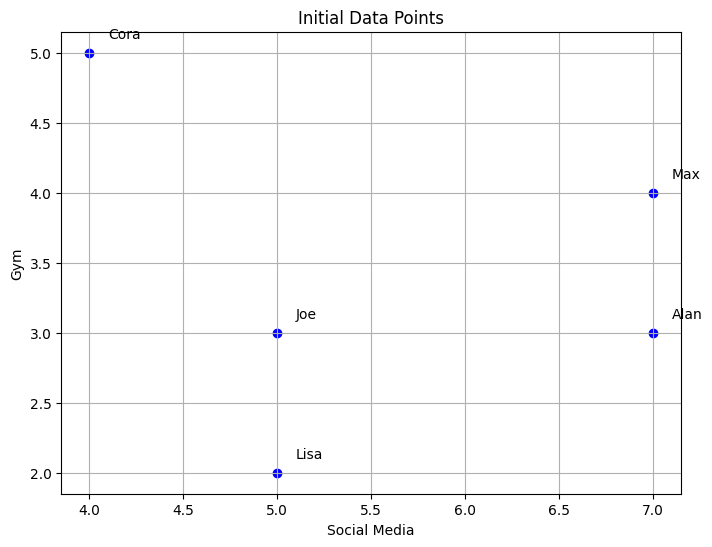

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(df['Social Media'], df['Gym'], color='blue')
for name, row in df.iterrows():
    plt.text(row['Social Media']+0.1, row['Gym']+0.1, name)
plt.xlabel('Social Media')
plt.ylabel('Gym')
plt.title('Initial Data Points')
plt.grid()
plt.show()


- A scatter plot is created to visualize the data, with 'Social Media' on the x-axis and 'Gym' on the y-axis.
- iterrows() is used to loop through the rows of the DataFrame, and the text() function adds the labels (names) near each data point.

### 4. Step 2: Compute the Linkage Matrix

In [6]:
Z = linkage(df.values, method='single', metric='euclidean')

- he linkage() function from scipy is used to perform hierarchical/agglomerative clustering.
- The method='single' indicates single-linkage clustering, where the distance between two clusters is the minimum distance between their points.
- The metric='euclidean' specifies Euclidean distance as the distance metric.

### 5. Initialize Clusters

In [7]:
n_samples = len(df)
current_clusters = {i: [i] for i in range(n_samples)}

- Each data point starts in its own cluster. A dictionary current_clusters is initialized, where the key is the cluster ID, and the value is a list of points in that cluster.

In [8]:
idx_to_name = dict(zip(range(n_samples), df.index))

- idx_to_name maps the DataFrame indices to the actual names of the individuals.

### 6. Function to Plot Clusters

In [9]:
def plot_clusters(df, clusters, step):
    plt.figure(figsize=(8,6))
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
    for idx, cluster_indices in enumerate(clusters):
        cluster_points = df.iloc[cluster_indices]
        plt.scatter(cluster_points['Social Media'], cluster_points['Gym'],
                    color=colors[idx % len(colors)], label=f'Cluster {idx+1}')
        for i in cluster_indices:
            name = idx_to_name[i]
            row = df.iloc[i]
            plt.text(row['Social Media']+0.1, row['Gym']+0.1, name)
    plt.xlabel('Social Media')
    plt.ylabel('Gym')
    plt.title(f'Clusters at Step {step}')
    plt.legend()
    plt.grid()
    plt.show()

- This function plots the current clusters at each step of the agglomerative clustering process.
- Different colors are used for each cluster.
- Names are added next to each point.

### 7. Function to Plot Dendrogram

In [10]:
def plot_dendrogram(Z, labels, num_clusters, step):
    plt.figure(figsize=(10,5))
    if num_clusters > 1:
        threshold = Z[-(num_clusters - 1), 2] + 1e-5
    else:
        threshold = 0
    dendrogram(Z, labels=labels, color_threshold=threshold)
    plt.title(f'Dendrogram at Step {step}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.axhline(y=threshold, c='k', linestyle='--', label='Threshold')
    plt.legend()
    plt.show()

- This function plots the dendrogram (a tree-like diagram) showing how clusters are merged.
- A threshold line is added based on the number of clusters at each step.

### 8. Step 3: Perform Agglomerative Clustering


Starting Agglomerative Clustering:

--- Step 1 ---
Clusters after merging:
  Cluster 1: ['Lisa']
  Cluster 2: ['Joe']
  Cluster 3: ['Cora']
  Cluster 4: ['Alan', 'Max']


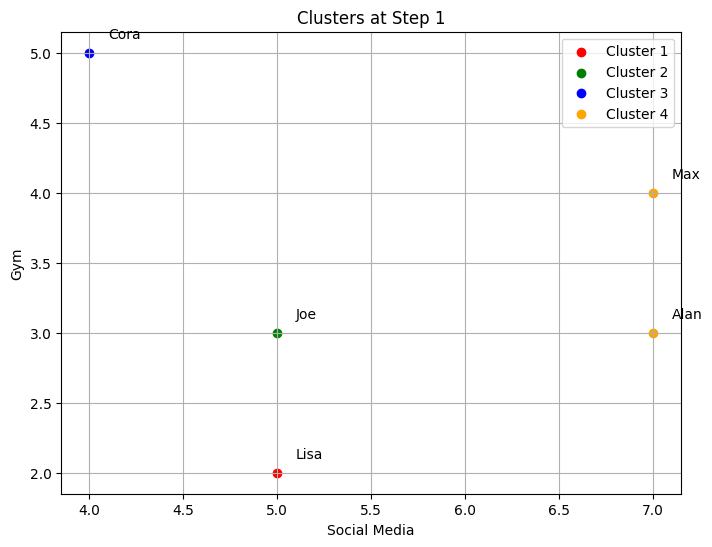

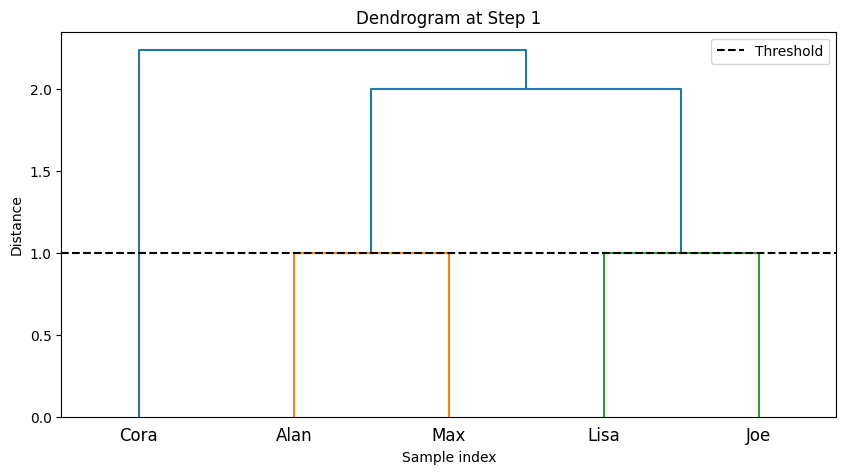


--- Step 2 ---
Clusters after merging:
  Cluster 1: ['Cora']
  Cluster 2: ['Alan', 'Max']
  Cluster 3: ['Lisa', 'Joe']


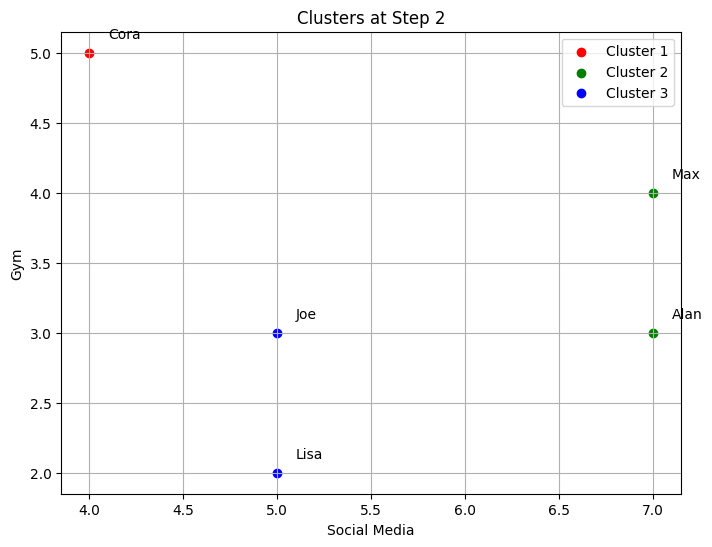

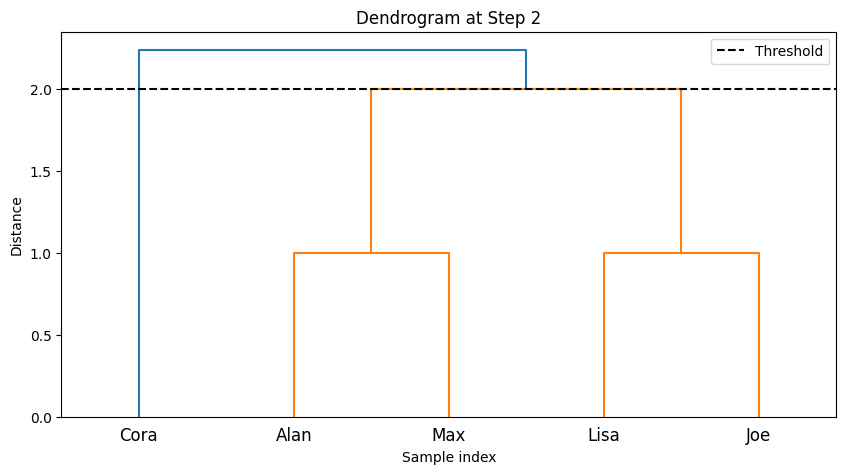


--- Step 3 ---
Clusters after merging:
  Cluster 1: ['Cora']
  Cluster 2: ['Alan', 'Max', 'Lisa', 'Joe']


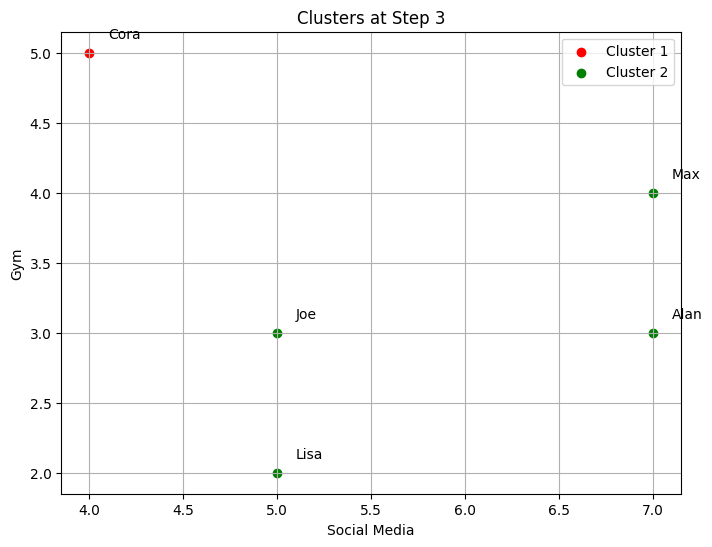

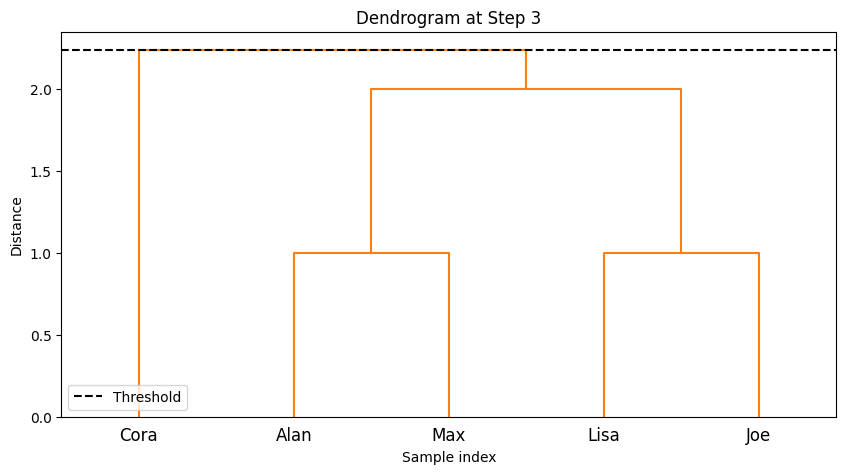


--- Step 4 ---
Clusters after merging:
  Cluster 1: ['Cora', 'Alan', 'Max', 'Lisa', 'Joe']


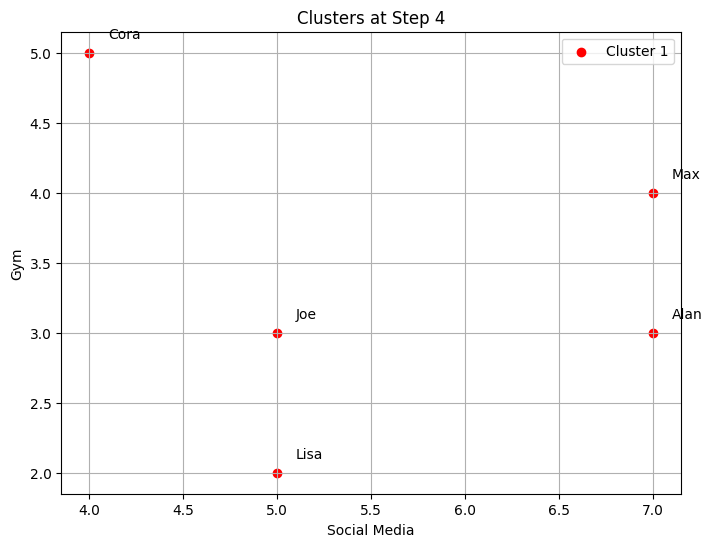

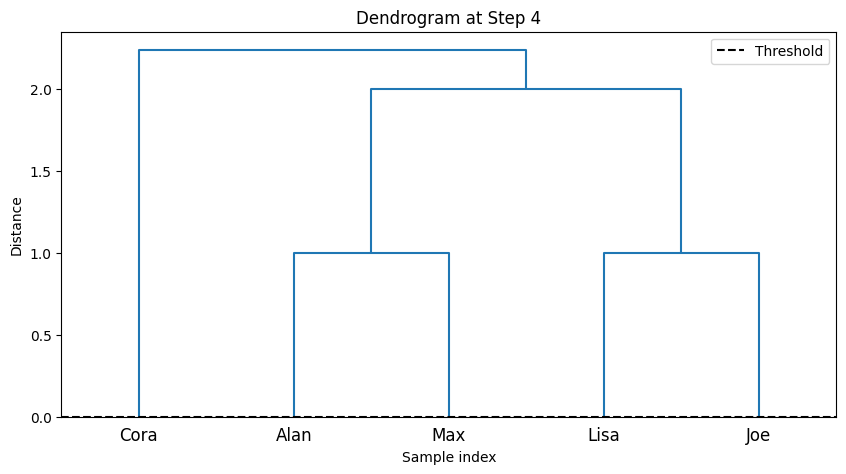

In [11]:
print("\nStarting Agglomerative Clustering:")
total_steps = Z.shape[0]
for step in range(total_steps):
    print(f"\n--- Step {step+1} ---")
    # Get clusters to merge
    cluster1 = int(Z[step, 0])
    cluster2 = int(Z[step, 1])
    new_cluster_id = n_samples + step  # New cluster ID

    # Get members of the clusters to be merged
    members_cluster1 = current_clusters.get(cluster1, [cluster1])
    members_cluster2 = current_clusters.get(cluster2, [cluster2])

    # Merge clusters
    new_cluster_members = members_cluster1 + members_cluster2

    # Update clusters
    # Remove old clusters
    current_clusters.pop(cluster1, None)
    current_clusters.pop(cluster2, None)
    # Add new cluster
    current_clusters[new_cluster_id] = new_cluster_members

    # Display current clusters
    print("Clusters after merging:")
    clusters_list = list(current_clusters.values())
    for idx, cluster in enumerate(clusters_list):
        names = [idx_to_name[i] for i in cluster]
        print(f"  Cluster {idx+1}: {names}")

    # Plot current clusters
    plot_clusters(df, clusters_list, step+1)

    # Plot dendrogram with current number of clusters
    num_clusters = len(clusters_list)
    plot_dendrogram(Z, df.index.tolist(), num_clusters, step+1)


-The code implements step-by-step agglomerative clustering, merging two clusters at each iteration. Here’s a detailed breakdown:

 - The process begins by determining the total number of steps, `total_steps`, which is based on the number of rows in the linkage matrix `Z`. The loop iterates through each step of the clustering process. In each step, two clusters (`cluster1` and `cluster2`) are identified for merging. These clusters are extracted from the linkage matrix `Z`. A new cluster ID is generated, representing the newly merged cluster. The code retrieves the members of both clusters to be merged. If the clusters contain more than one data point (from previous merges), the full list of points in those clusters is fetched. The members of the two clusters are combined into a new cluster (`new_cluster_members`). The old clusters (`cluster1` and `cluster2`) are removed from `current_clusters`, and the new merged cluster is added to the dictionary under `new_cluster_id`. 

 - After each merge, the current state of the clusters is printed, showing which data points belong to each cluster. The `idx_to_name` dictionary maps the data point indices to their corresponding names. The function `plot_clusters` visualizes the current clusters after the merge. Each cluster is plotted with a different color on a 2D graph representing the "Social Media" and "Gym" features. Finally, the code calls `plot_dendrogram` to plot the hierarchical dendrogram at each step. The dendrogram illustrates how the clusters are merged over time. A threshold line is added to show the current number of clusters.


### 9. Step 4: Final Clusters

In [12]:
# Step 4: Final Clusters
print("\nFinal Clusters:")
for idx, cluster in enumerate(clusters_list):
    names = [idx_to_name[i] for i in cluster]
    print(f"  Cluster {idx+1}: {names}")



Final Clusters:
  Cluster 1: ['Cora', 'Alan', 'Max', 'Lisa', 'Joe']


- The final clusters are printed after all merges are complete.

## Agglomerative Single Linkage Clustering Implementation in Python (Full code)

Initial Data:
      Social Media  Gym
Name                   
Alan             7    3
Lisa             5    2
Joe              5    3
Max              7    4
Cora             4    5


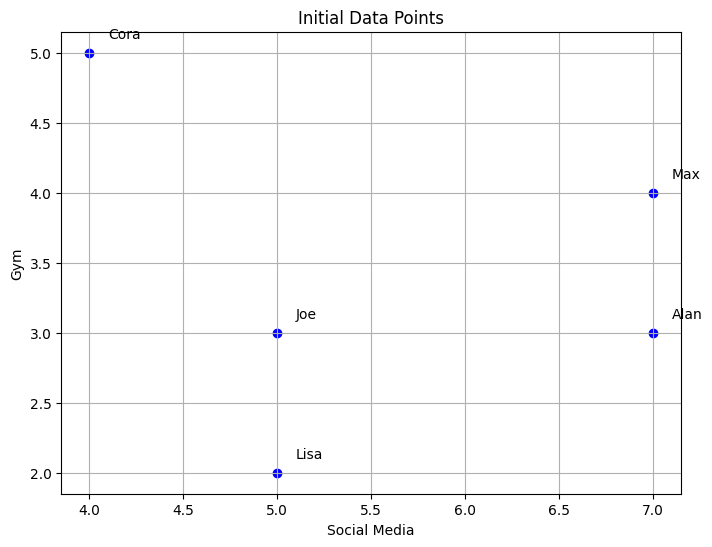


Starting Agglomerative Clustering:

--- Step 1 ---
Clusters after merging:
  Cluster 1: ['Lisa']
  Cluster 2: ['Joe']
  Cluster 3: ['Cora']
  Cluster 4: ['Alan', 'Max']


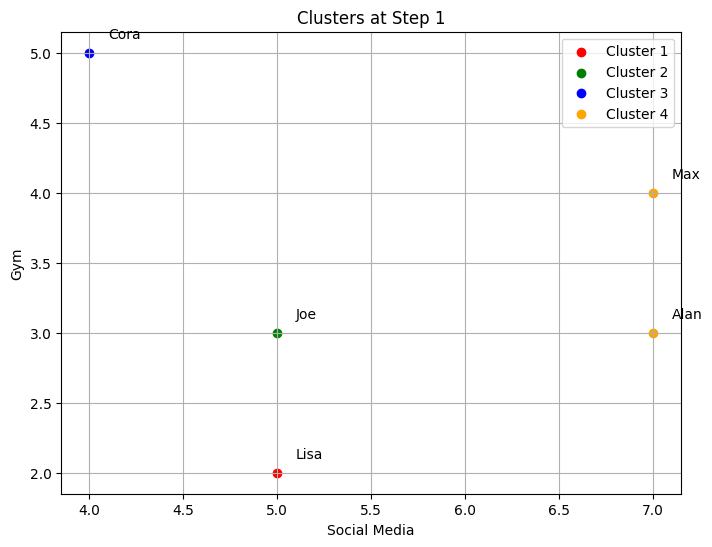

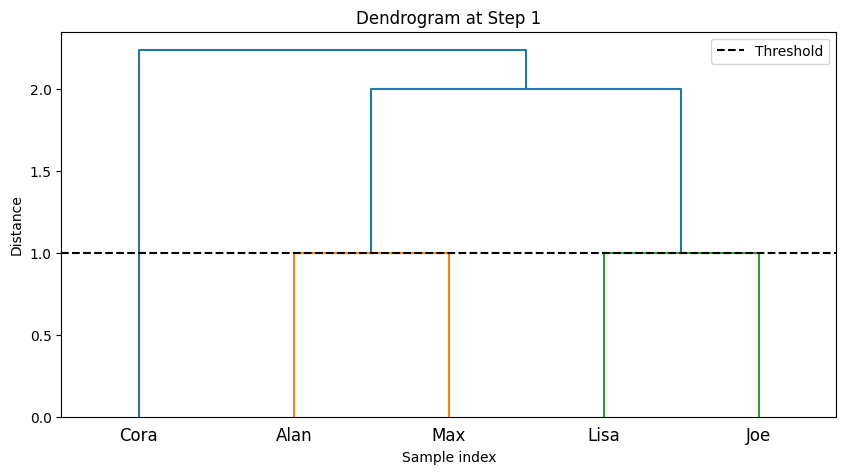


--- Step 2 ---
Clusters after merging:
  Cluster 1: ['Cora']
  Cluster 2: ['Alan', 'Max']
  Cluster 3: ['Lisa', 'Joe']


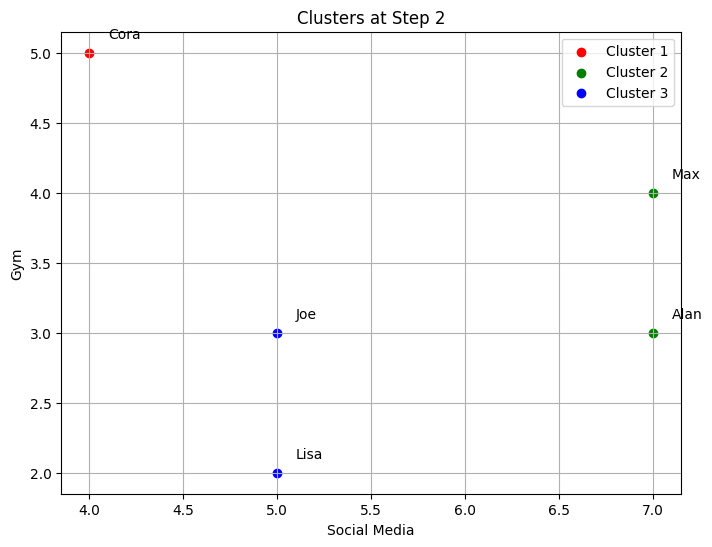

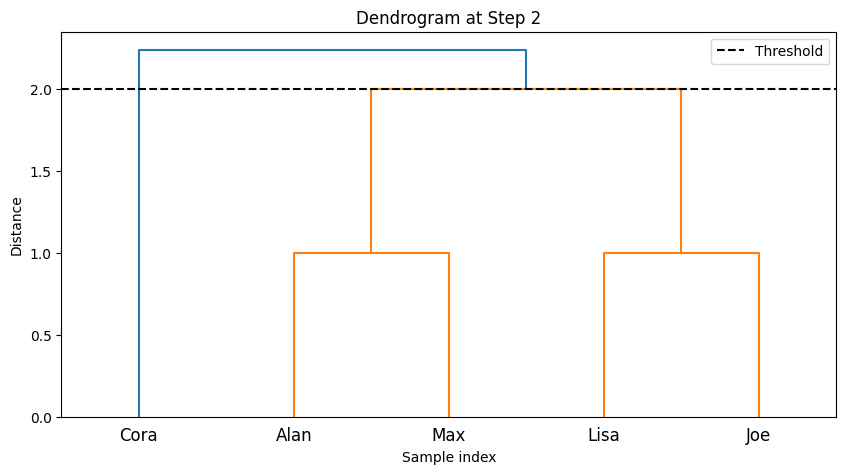


--- Step 3 ---
Clusters after merging:
  Cluster 1: ['Cora']
  Cluster 2: ['Alan', 'Max', 'Lisa', 'Joe']


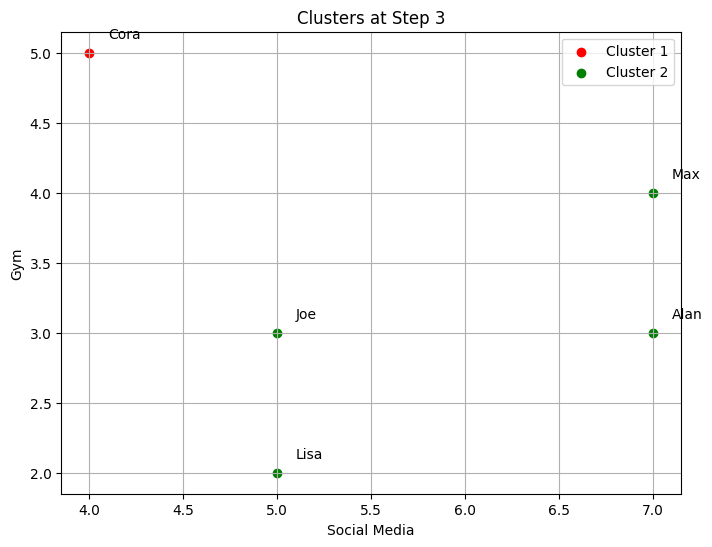

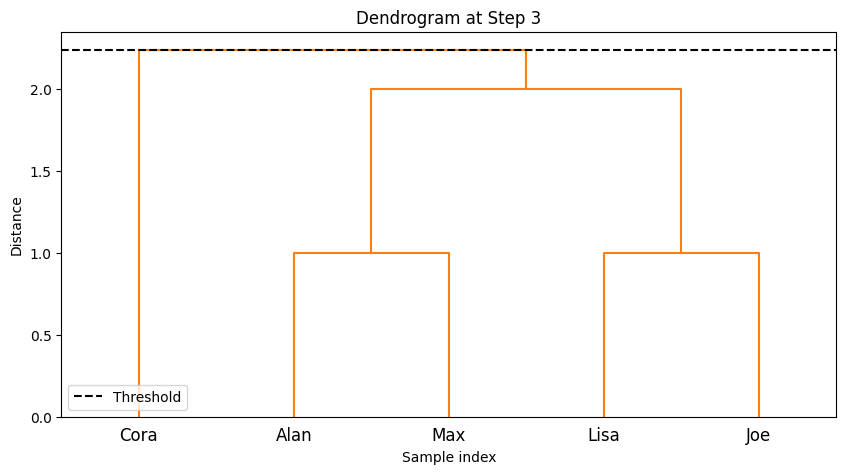


--- Step 4 ---
Clusters after merging:
  Cluster 1: ['Cora', 'Alan', 'Max', 'Lisa', 'Joe']


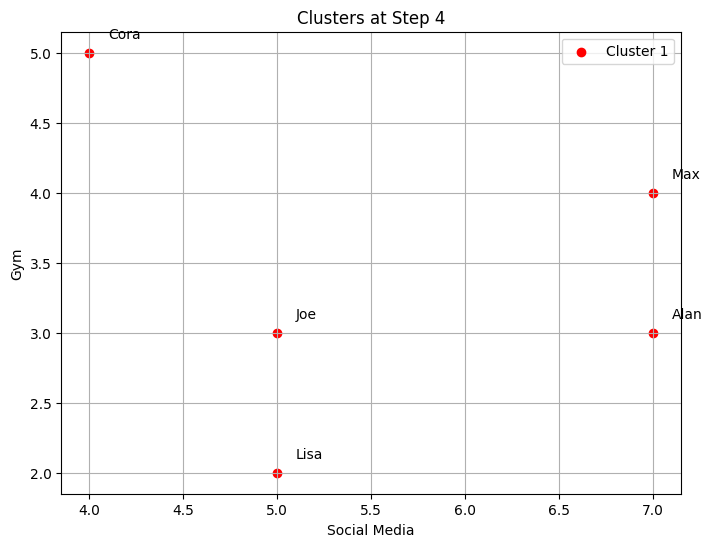

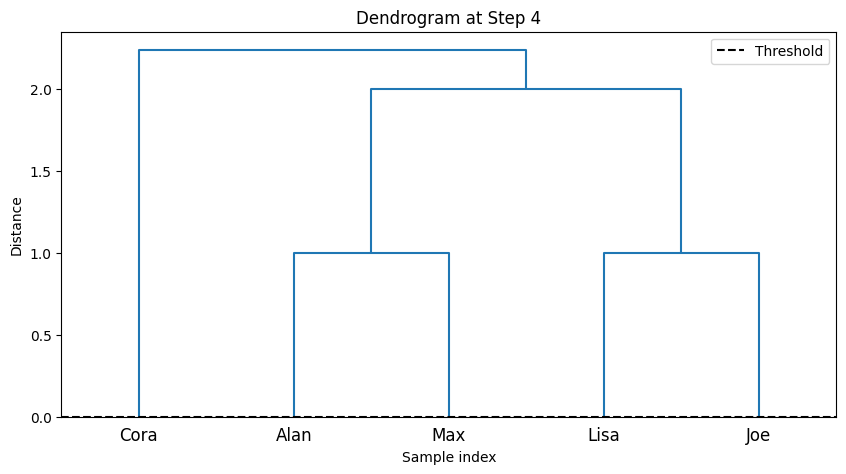


Final Clusters:
  Cluster 1: ['Cora', 'Alan', 'Max', 'Lisa', 'Joe']


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the data into a DataFrame
data = {
    "Name": ['Alan', 'Lisa', 'Joe', 'Max', 'Cora'],
    "Social Media": [7, 5, 5, 7, 4],
    "Gym": [3, 2, 3, 4, 5]
}

df = pd.DataFrame(data)
df.set_index('Name', inplace=True)

print("Initial Data:")
print(df)

# Plot the initial data points
plt.figure(figsize=(8,6))
plt.scatter(df['Social Media'], df['Gym'], color='blue')
for name, row in df.iterrows():
    plt.text(row['Social Media']+0.1, row['Gym']+0.1, name)
plt.xlabel('Social Media')
plt.ylabel('Gym')
plt.title('Initial Data Points')
plt.grid()
plt.show()

# Step 2: Compute the linkage matrix
Z = linkage(df.values, method='single', metric='euclidean')

# Initialize clusters: each data point is its own cluster
n_samples = len(df)
current_clusters = {i: [i] for i in range(n_samples)}

# Mapping from indices to names
idx_to_name = dict(zip(range(n_samples), df.index))

# Function to plot clusters at each step
def plot_clusters(df, clusters, step):
    plt.figure(figsize=(8,6))
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
    for idx, cluster_indices in enumerate(clusters):
        cluster_points = df.iloc[cluster_indices]
        plt.scatter(cluster_points['Social Media'], cluster_points['Gym'],
                    color=colors[idx % len(colors)], label=f'Cluster {idx+1}')
        for i in cluster_indices:
            name = idx_to_name[i]
            row = df.iloc[i]
            plt.text(row['Social Media']+0.1, row['Gym']+0.1, name)
    plt.xlabel('Social Media')
    plt.ylabel('Gym')
    plt.title(f'Clusters at Step {step}')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot dendrogram with appropriate color threshold
def plot_dendrogram(Z, labels, num_clusters, step):
    plt.figure(figsize=(10,5))
    # Determine the color threshold to separate clusters
    if num_clusters > 1:
        # The threshold is the distance before the last merge at this step
        threshold = Z[-(num_clusters - 1), 2] + 1e-5  # Small epsilon to include the last merge
    else:
        threshold = 0
    dendrogram(Z, labels=labels, color_threshold=threshold)
    plt.title(f'Dendrogram at Step {step}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.axhline(y=threshold, c='k', linestyle='--', label='Threshold')
    plt.legend()
    plt.show()

# Step 3: Perform Agglomerative Clustering step by step
print("\nStarting Agglomerative Clustering:")
total_steps = Z.shape[0]
for step in range(total_steps):
    print(f"\n--- Step {step+1} ---")
    # Get clusters to merge
    cluster1 = int(Z[step, 0])
    cluster2 = int(Z[step, 1])
    new_cluster_id = n_samples + step  # New cluster ID

    # Get members of the clusters to be merged
    members_cluster1 = current_clusters.get(cluster1, [cluster1])
    members_cluster2 = current_clusters.get(cluster2, [cluster2])

    # Merge clusters
    new_cluster_members = members_cluster1 + members_cluster2

    # Update clusters
    # Remove old clusters
    current_clusters.pop(cluster1, None)
    current_clusters.pop(cluster2, None)
    # Add new cluster
    current_clusters[new_cluster_id] = new_cluster_members

    # Display current clusters
    print("Clusters after merging:")
    clusters_list = list(current_clusters.values())
    for idx, cluster in enumerate(clusters_list):
        names = [idx_to_name[i] for i in cluster]
        print(f"  Cluster {idx+1}: {names}")

    # Plot current clusters
    plot_clusters(df, clusters_list, step+1)

    # Plot dendrogram with current number of clusters
    num_clusters = len(clusters_list)
    plot_dendrogram(Z, df.index.tolist(), num_clusters, step+1)

# Step 4: Final Clusters
print("\nFinal Clusters:")
for idx, cluster in enumerate(clusters_list):
    names = [idx_to_name[i] for i in cluster]
    print(f"  Cluster {idx+1}: {names}")


## Refrences
**1. [Hierarchical Clustering; Agglomerative (HAC) & Divisive (HDC)](https://primo.ai/index.php?title=Hierarchical_Clustering;_Agglomerative_%28HAC%29_%26_Divisive_%28HDC%29)**

**2. [Hierarchical cluster analysis](https://datatab.net/tutorial/hierarchical-cluster-analysis)**

**3. [Hierarchical cluster analysis calculator](https://datatab.net/statistics-calculator/cluster/hierarchical-cluster-analysis-calculator?example=hierarchical_cluster_analysis)**

**4. [Hierarchical Clustering 3: single-link vs. complete-link](https://youtu.be/VMyXc3SiEqs?si=3iAtz3mZxbS4zX8u)**

**5. [Scikit-learn User Guide](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)**

**6. [SciPy Hierarchical Clustering and Dendrogram](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)**

**7. [ML | Types of Linkages in Clustering](https://www.geeksforgeeks.org/ml-types-of-linkages-in-clustering/)**

**8. [Example: Agglomerative Hierarchical Clustering](https://online.stat.psu.edu/stat555/node/86/)**

**9. [Comparing different hierarchical linkage methods on toy datasets](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html)**

**10. [Cluster linkage](https://drive5.com/usearch/manual/linkage.html)**